## Przygotowanie danych

In [1]:
import pandas as pd 
import numpy as np

In [2]:
# Path to folder with data 
folder_path = "mimic-iii-clinical-database-demo-1.4/"



# Data 


pacient = pd.read_csv(folder_path+"PATIENTS.csv")
labevents = pd.read_csv(folder_path+"LABEVENTS.csv")
admissions = pd.read_csv(folder_path+"ADMISSIONS.csv")

In [3]:
#Clean admissions 

admissions_c=admissions.iloc[:,[1,2,3,6,7,10,11,12,13,9,8,17]]
admissions_c.admittime=pd.to_datetime(admissions_c.admittime)

# Zostawiam dane tylko z ostatniej wizyty w szpitalu 
admissions_c=admissions_c.iloc[admissions_c.groupby(["subject_id"]).admittime.idxmax(),:]

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [4]:
# Clean pacient 
pacient_c=pacient.iloc[:,[1,2,3,4,5,7]]

In [5]:
pacient_c

,subject_id,gender,dob,dod,dod_hosp,expire_flag
0,10006,F,2094-03-05 00:00:00,2165-08-12 00:00:00,2165-08-12 00:00:00,1
1,10011,F,2090-06-05 00:00:00,2126-08-28 00:00:00,2126-08-28 00:00:00,1
2,10013,F,2038-09-03 00:00:00,2125-10-07 00:00:00,2125-10-07 00:00:00,1
3,10017,F,2075-09-21 00:00:00,2152-09-12 00:00:00,NaN,1
4,10019,M,2114-06-20 00:00:00,2163-05-15 00:00:00,2163-05-15 00:00:00,1
...,...,...,...,...,...,...
95,44083,M,2057-11-15 00:00:00,2114-02-20 00:00:00,2114-02-20 00:00:00,1
96,44154,M,1878-05-14 00:00:00,2178-05-15 00:00:00,2178-05-15 00:00:00,1
97,44212,F,2078-06-16 00:00:00,2124-01-29 00:00:00,NaN,1
98,44222,M,2107-06-27 00:00:00,2182-08-03 00:00:00,2182-08-03 00:00:00,1


In [6]:
# Clean lab
labevents_c=labevents[-pd.isnull(labevents["hadm_id"])].iloc[:,[1,2,4,6,8]]
# Najpierw policzymy nieprawidłowe wyniki dla każdego pacjenta 
labevents_c = labevents_c.iloc[:,[0,1,4]]

labevents_c.flag = labevents_c.flag.apply(lambda x: x=="abnormal")

labevents_c=labevents_c.groupby(["subject_id","hadm_id",]).sum().reset_index()

In [7]:
# Łączenie 


# Najpierw wybieramy tylko wyniki dla ostatnich wizyt 


admission_labs=admissions_c.join(labevents_c,lsuffix="hadm_id",rsuffix="hadm_id").reset_index()


admission_labs.rename(columns={"subject_idhadm_id":"subject_id","hadm_idhadm_id":"hadm_id","flag":"flag_sum"},inplace=True)

# Ramka pacient 

admissin_lab_pacient = admission_labs.join(pacient_c,lsuffix="subject_id",rsuffix="subject_id")



In [8]:
admissin_lab_pacient=admissin_lab_pacient=admissin_lab_pacient.drop(admissin_lab_pacient.columns[[0,2,13,14,16,21]], axis=1)

In [9]:
# Finalne Dane
# Daty raczej kosz
# Można próbować albo z flag_sum (ale to ciężko) lepiej przewidywać albo gender, albo hospital_expire_flag ( umarł czy nie w szpitalu)

admissin_lab_pacient 

,admittime,admission_type,admission_location,language,religion,marital_status,ethnicity,insurance,discharge_location,hospital_expire_flag,flag_sum,gender,dob,dod,dod_hosp
0,2164-10-23 21:09:00,EMERGENCY,EMERGENCY ROOM ADMIT,NaN,CATHOLIC,SEPARATED,BLACK/AFRICAN AMERICAN,Medicare,HOME HEALTH CARE,0,91,F,2094-03-05 00:00:00,2165-08-12 00:00:00,2165-08-12 00:00:00
1,2126-08-14 22:32:00,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,NaN,CATHOLIC,SINGLE,UNKNOWN/NOT SPECIFIED,Private,DEAD/EXPIRED,1,250,F,2090-06-05 00:00:00,2126-08-28 00:00:00,2126-08-28 00:00:00
2,2125-10-04 23:36:00,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,NaN,CATHOLIC,NaN,UNKNOWN/NOT SPECIFIED,Medicare,DEAD/EXPIRED,1,38,F,2038-09-03 00:00:00,2125-10-07 00:00:00,2125-10-07 00:00:00
3,2149-05-26 17:19:00,EMERGENCY,EMERGENCY ROOM ADMIT,NaN,CATHOLIC,DIVORCED,WHITE,Medicare,SNF,0,109,F,2075-09-21 00:00:00,2152-09-12 00:00:00,NaN
4,2163-05-14 20:43:00,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,NaN,CATHOLIC,DIVORCED,WHITE,Medicare,DEAD/EXPIRED,1,142,M,2114-06-20 00:00:00,2163-05-15 00:00:00,2163-05-15 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2112-05-28 15:45:00,EMERGENCY,EMERGENCY ROOM ADMIT,ENGL,CATHOLIC,SINGLE,WHITE,Private,HOME,0,78,M,2057-11-15 00:00:00,2114-02-20 00:00:00,2114-02-20 00:00:00
96,2178-05-14 20:29:00,EMERGENCY,EMERGENCY ROOM ADMIT,ENGL,PROTESTANT QUAKER,MARRIED,WHITE,Medicare,DEAD/EXPIRED,1,48,M,1878-05-14 00:00:00,2178-05-15 00:00:00,2178-05-15 00:00:00
97,2123-11-24 14:14:00,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,ENGL,UNOBTAINABLE,SINGLE,BLACK/AFRICAN AMERICAN,Medicare,REHAB/DISTINCT PART HOSP,0,1237,F,2078-06-16 00:00:00,2124-01-29 00:00:00,NaN
98,2180-07-19 06:55:00,EMERGENCY,EMERGENCY ROOM ADMIT,ENGL,CATHOLIC,SINGLE,WHITE,Medicare,HOME,0,20,M,2107-06-27 00:00:00,2182-08-03 00:00:00,2182-08-03 00:00:00


## Analiza danych

In [10]:
df = admissin_lab_pacient

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   admittime             100 non-null    datetime64[ns]
 1   admission_type        100 non-null    object        
 2   admission_location    100 non-null    object        
 3   language              57 non-null     object        
 4   religion              99 non-null     object        
 5   marital_status        85 non-null     object        
 6   ethnicity             100 non-null    object        
 7   insurance             100 non-null    object        
 8   discharge_location    100 non-null    object        
 9   hospital_expire_flag  100 non-null    int64         
 10  flag_sum              100 non-null    int64         
 11  gender                100 non-null    object        
 12  dob                   100 non-null    object        
 13  dod                  

### Usuwanie braków danych i rzadko występujących kategorii

In [12]:
df['language'].value_counts()

ENGL    49
RUSS     4
SPAN     2
POLI     1
MAND     1
Name: language, dtype: int64

In [13]:
small_languages = df['language'].value_counts()[df['language'].value_counts() < 5].index

df['language'] = np.where(df['language'].isin(small_languages), 'OTHER',
                          np.where(df['language'].isna(), 'UNKNOWN', df['language']))

In [14]:
df['religion'].value_counts()

CATHOLIC               39
UNOBTAINABLE           16
NOT SPECIFIED          15
PROTESTANT QUAKER      10
JEWISH                  9
OTHER                   4
CHRISTIAN SCIENTIST     3
ROMANIAN EAST. ORTH     1
MUSLIM                  1
BUDDHIST                1
Name: religion, dtype: int64

In [15]:
small_religions = df['religion'].value_counts()[df['religion'].value_counts() < 4].index

df['religion'] = np.where(df['religion'].isin(small_religions), 'OTHER',
                          np.where(df['religion'].isna(), 'OTHER', df['religion']))

In [16]:
df['marital_status'].value_counts()

MARRIED              41
SINGLE               20
WIDOWED              14
DIVORCED              6
UNKNOWN (DEFAULT)     3
SEPARATED             1
Name: marital_status, dtype: int64

In [17]:
df['marital_status'] = np.where(df['marital_status'].isin(['DIVORCED', 'SEPARATED']), 'OTHER',
                          np.where(df['marital_status'].isna(), 'UNKNOWN (DEFAULT)', df['marital_status']))

In [18]:
df['ethnicity'].value_counts()

WHITE                                                       74
UNKNOWN/NOT SPECIFIED                                       10
BLACK/AFRICAN AMERICAN                                       6
OTHER                                                        3
HISPANIC OR LATINO                                           2
ASIAN                                                        2
HISPANIC/LATINO - PUERTO RICAN                               1
UNABLE TO OBTAIN                                             1
AMERICAN INDIAN/ALASKA NATIVE FEDERALLY RECOGNIZED TRIBE     1
Name: ethnicity, dtype: int64

In [19]:
small_ethnicities = df['ethnicity'].value_counts()[df['ethnicity'].value_counts() < 4].index

df['ethnicity'] = np.where(df['ethnicity'] == 'UNABLE TO OBTAIN', 'UNKNOWN/NOT SPECIFIED',
                          np.where(df['ethnicity'].isin(small_ethnicities), 'OTHER', df['ethnicity']))

In [20]:
df['insurance'].value_counts()

Medicare      75
Private       19
Medicaid       5
Government     1
Name: insurance, dtype: int64

In [21]:
df['insurance'] = np.where(df['insurance'].isin(['Medicaid', 'Government']), 'Other', df['insurance'])

### Obliczenie wieku

In [22]:
from datetime import date
df['age'] = pd.to_datetime(df['admittime']).dt.year - pd.to_datetime(df['dob']).dt.year
df['age'] = np.where(df['age'] == 300, 100, df['age'])

### Opuszczenie niepotrzebnych kolumn

In [23]:
df = df.drop(df.columns[[0,8,12,13,14]], axis = 1)

### Transformacja zmiennych kategorycznych

In [24]:
from sklearn.preprocessing import OneHotEncoder
columns_to_encode = ["admission_type", "admission_location", "language", "religion", "marital_status", "ethnicity", 
                     "insurance", "gender"]
onehot_encoder = OneHotEncoder(sparse=False)
onehot_encoded = onehot_encoder.fit_transform(df[columns_to_encode])
df_final = pd.concat([df, pd.DataFrame(onehot_encoded)], axis=1).drop(columns_to_encode, axis=1)
df_final

,hospital_expire_flag,flag_sum,age,0,1,2,3,4,5,6,...,20,21,22,23,24,25,26,27,28,29
0,0,91,70,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,1,250,36,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
2,1,38,87,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0,109,74,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
4,1,142,49,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0,78,55,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
96,1,48,100,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
97,0,1237,45,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
98,0,20,73,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0


## Przygotowanie modelu

### Podział danych

In [25]:
X = df_final[df_final.columns[1:]]
y = df_final['hospital_expire_flag']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Utworzenie modelu

In [26]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=1000)

lr.fit(X_train,y_train)
y_hat = lr.predict(X_test)

### Ocena modelu

In [27]:
from sklearn.metrics import f1_score,roc_auc_score
print(f'f1: {f1_score(y_test,y_hat)}')
print(f'roc_auc: {roc_auc_score(y_test,y_hat)}')

f1: 0.35294117647058826
roc_auc: 0.6071428571428571


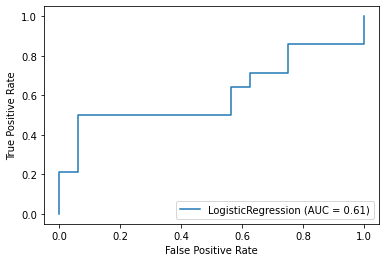

In [28]:
from sklearn import metrics
metrics.plot_roc_curve(lr, X_test, y_test)